In [1]:
import mne
#%gui qt
#import matplotlib

#%matplotlib qt
import numpy as np
from matplotlib import pyplot as plt
from stormdb.access import Query
from pickle import load
from scipy import stats
from mne.datasets import sample
from mne.stats import spatio_temporal_cluster_1samp_test
import os
import pickle
from copy import deepcopy
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
# os.environ['ETS_TOOLKIT'] = 'qt4'
# os.environ['QT_API'] = 'pyqt5'
# %gui qt
#mne.viz.set_3d_backend("notebook")

In [11]:
proj_name = 'MINDLAB2020_MEG-AuditoryPatternRecognition'
wdir = '/projects/' + proj_name + '/scratch/working_memory/'
stats_dir = wdir + 'results/stats/'
data_dir = wdir + 'averages/data/'

subs_dir = '/projects/' + proj_name + '/scratch/fs_subjects_dir/'
# sample_path = sample.data_path()
# sample_subjects_dir = sample_path + '/subjects'
src = mne.read_source_spaces(subs_dir + '0024_JSV/bem/0024_JSV_vol-src.fif')

    Reading a source space...
    [done]
    1 source spaces read


In [15]:
# Load a source time course
dfname = data_dir + '0024_JSV_TFR_src2_HFA.p'
dfile = open(dfname,'rb')
all_stc = pickle.load(dfile)
dfile.close()
# stc = deepcopy(all_stc['same'])
# del all_stc

# # load source morph
# morph = mne.read_source_morph(subs_dir + '0024_JSV/bem/0024_JSV_vol-morph.h5')
# stc = morph.apply(stc)
# print(stc)

same
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Showing: t = 2.630 s, (-56.4, -56.0, -37.6) mm, [4, 15, 7] vox, 9366 vertex
Using control points [0.17734368 0.19376017 0.29077791]


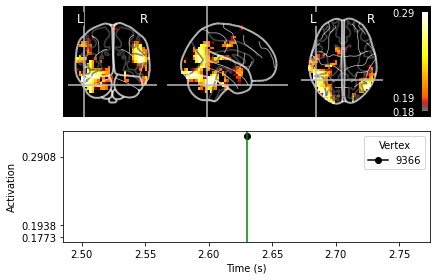

different
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Showing: t = 2.630 s, (24.1, -92.9, -21.2) mm, [19, 6, 8] vox, 10373 vertex
Using control points [0.15772709 0.16912816 0.23325901]


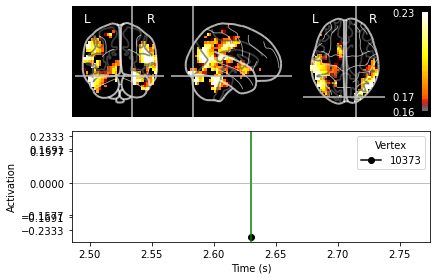

inverted
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Showing: t = 2.630 s, (-34.1, -90.5, -23.7) mm, [8, 7, 8] vox, 10393 vertex
Using control points [0.22082167 0.2404388  0.31393657]


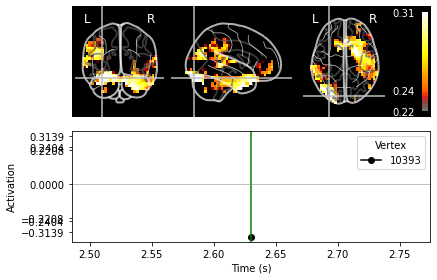

other
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Showing: t = 2.630 s, (-39.5, -86.2, -24.8) mm, [7, 8, 8] vox, 10423 vertex
Using control points [0.18498332 0.20084154 0.26273091]


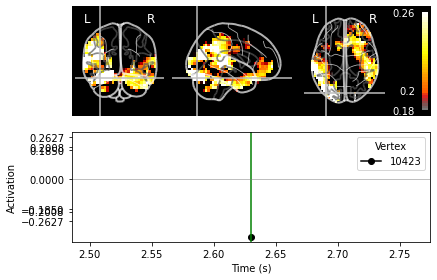

In [16]:
# Plot 1 stc
for s in all_stc:
        print('{}'.format(s))
        brain = all_stc[s].mean().plot(subjects_dir=subs_dir,#initial_time = pt,#clim={'kind': 'value', 'lims': [10,15,20]},#time_viewer=True,
                                mode = 'glass_brain',src = src)

same 0.0
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.0 sec
Showing: t = 0.000 s, (60.5, 6.3, 19.0) mm, [27, 24, 19] vox, 24920 vertex
Using control points [0.34154685 0.37557444 0.59617215]


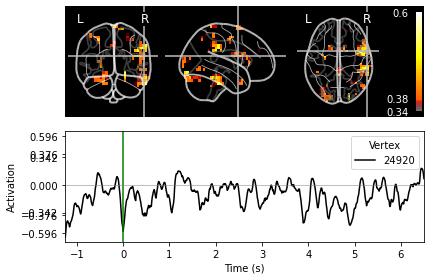

same 0.1
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.1 sec
Showing: t = 0.100 s, (-6.9, -31.8, 30.5) mm, [14, 16, 20] vox, 25930 vertex
Using control points [0.34154685 0.37557444 0.59617215]


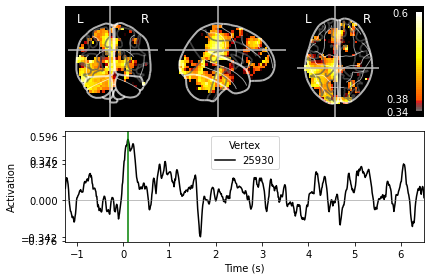

same 0.2
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.2 sec
Showing: t = 0.200 s, (-63.8, -47.2, 15.4) mm, [3, 14, 17] vox, 22044 vertex
Using control points [0.34154685 0.37557444 0.59617215]


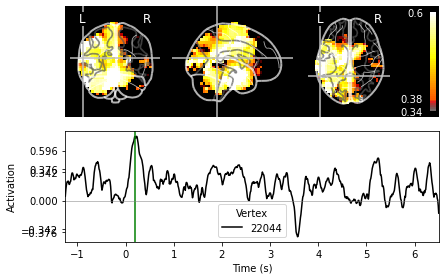

same 0.30000000000000004
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.30000000000000004 sec
Showing: t = 0.300 s, (-57.4, -39.5, -30.2) mm, [4, 18, 9] vox, 12001 vertex
Using control points [0.34154685 0.37557444 0.59617215]


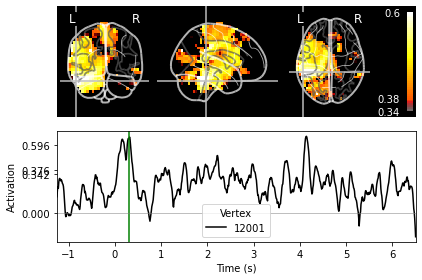

same 0.4
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.4 sec
Showing: t = 0.400 s, (48.4, -58.9, -5.7) mm, [24, 12, 12] vox, 15648 vertex
Using control points [0.34154685 0.37557444 0.59617215]


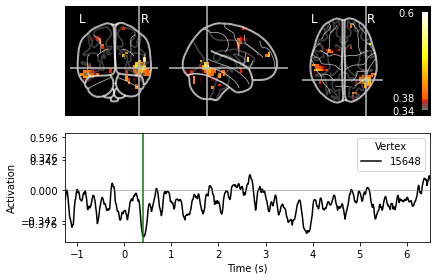

same 0.5
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.5 sec
Showing: t = 0.500 s, (47.9, -73.8, 30.6) mm, [24, 7, 18] vox, 23119 vertex
Using control points [0.34154685 0.37557444 0.59617215]


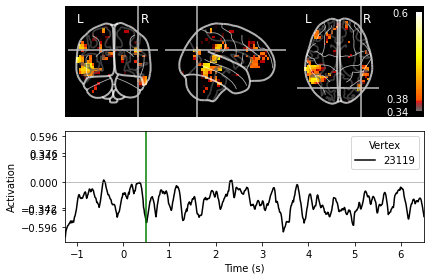

same 0.6000000000000001
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.6000000000000001 sec
Showing: t = 0.600 s, (39.6, -94.2, -9.3) mm, [22, 5, 10] vox, 12887 vertex
Using control points [0.34154685 0.37557444 0.59617215]


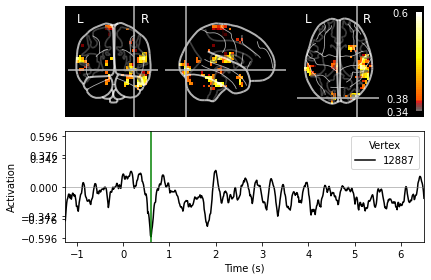

same 0.7000000000000001
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.7000000000000001 sec
Showing: t = 0.700 s, (58.7, -60.4, 6.0) mm, [26, 11, 14] vox, 18161 vertex
Using control points [0.34154685 0.37557444 0.59617215]


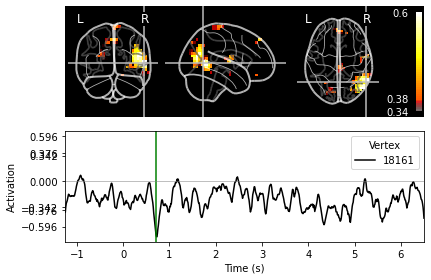

same 0.8
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.8 sec
Showing: t = 0.800 s, (49.1, -80.5, 4.6) mm, [24, 7, 13] vox, 16764 vertex
Using control points [0.34154685 0.37557444 0.59617215]


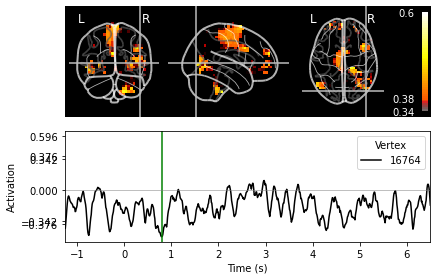

same 0.9
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.9 sec
Showing: t = 0.900 s, (-56.9, -70.8, -1.2) mm, [4, 10, 13] vox, 16837 vertex
Using control points [0.34154685 0.37557444 0.59617215]


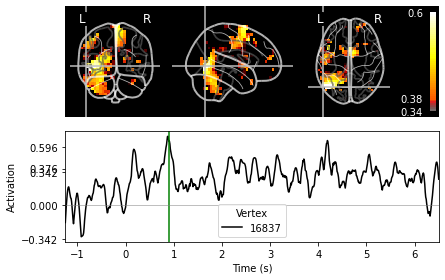

same 1.0
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.0 sec
Showing: t = 1.000 s, (47.6, -18.4, -36.8) mm, [24, 22, 8] vox, 10874 vertex
Using control points [0.34154685 0.37557444 0.59617215]


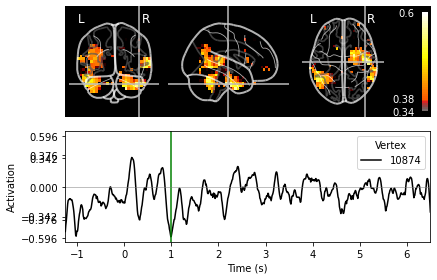

same 1.1
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.1 sec
Showing: t = 1.100 s, (-16.9, -14.0, -12.3) mm, [12, 22, 13] vox, 17217 vertex
Using control points [0.34154685 0.37557444 0.59617215]


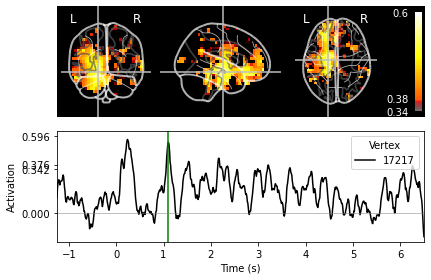

same 1.2000000000000002
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.2000000000000002 sec
Showing: t = 1.200 s, (50.8, -34.7, 49.7) mm, [25, 14, 23] vox, 29692 vertex
Using control points [0.34154685 0.37557444 0.59617215]


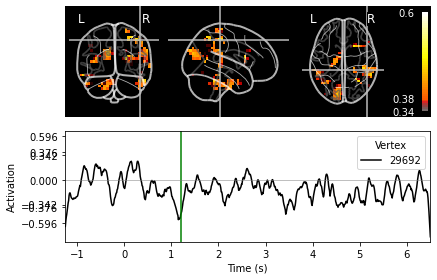

same 1.3
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.3 sec
Showing: t = 1.300 s, (42.2, -71.3, 40.9) mm, [23, 7, 20] vox, 25660 vertex
Using control points [0.34154685 0.37557444 0.59617215]


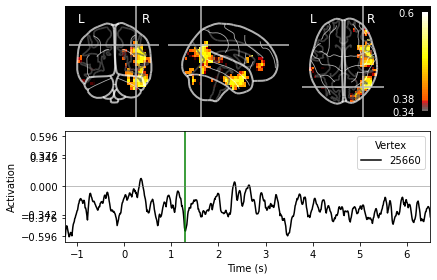

same 1.4000000000000001
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.4000000000000001 sec
Showing: t = 1.400 s, (-50.8, -68.2, -29.2) mm, [5, 12, 8] vox, 10545 vertex
Using control points [0.34154685 0.37557444 0.59617215]


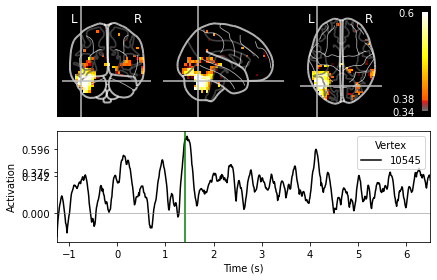

same 1.5
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.5 sec
Showing: t = 1.500 s, (-41.4, -46.7, -22.6) mm, [7, 16, 10] vox, 13213 vertex
Using control points [0.34154685 0.37557444 0.59617215]


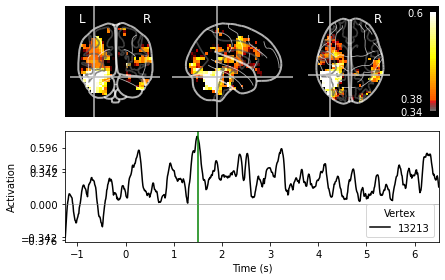

same 1.6
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.6 sec
Showing: t = 1.600 s, (64.4, -48.6, -24.0) mm, [27, 15, 9] vox, 11931 vertex
Using control points [0.34154685 0.37557444 0.59617215]


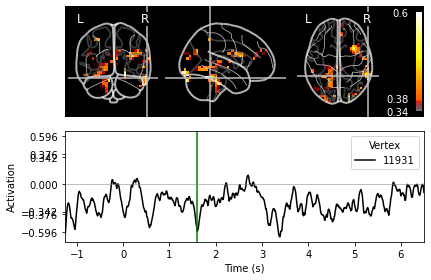

same 1.7000000000000002
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.7000000000000002 sec
Showing: t = 1.700 s, (24.1, -92.9, -21.2) mm, [19, 6, 8] vox, 10373 vertex
Using control points [0.34154685 0.37557444 0.59617215]


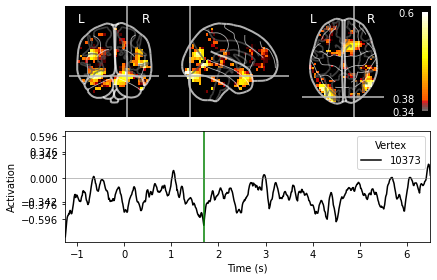

same 1.8
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.8 sec
Showing: t = 1.800 s, (-3.1, 44.9, -30.4) mm, [15, 35, 12] vox, 16352 vertex
Using control points [0.34154685 0.37557444 0.59617215]


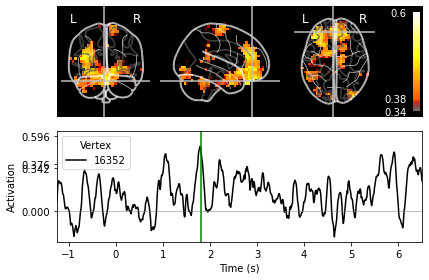

same 1.9000000000000001
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.9000000000000001 sec
Showing: t = 1.900 s, (-10.8, -11.4, -40.3) mm, [13, 24, 8] vox, 10925 vertex
Using control points [0.34154685 0.37557444 0.59617215]


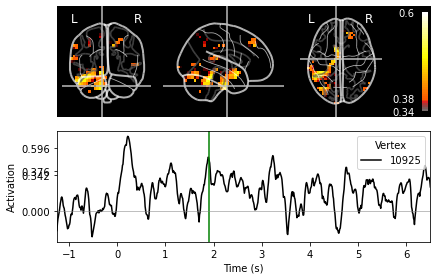

different 0.0
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.0 sec
Showing: t = 0.000 s, (68.4, -44.9, 8.4) mm, [28, 14, 15] vox, 19527 vertex
Using control points [0.32098109 0.35320545 0.56234833]


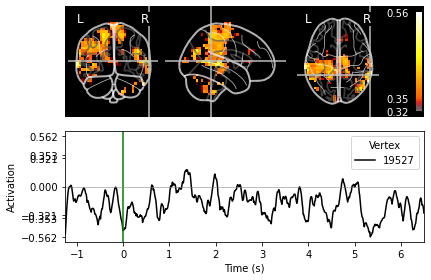

different 0.1
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.1 sec
Showing: t = 0.100 s, (-41.7, -62.9, 8.6) mm, [7, 11, 15] vox, 19413 vertex
Using control points [0.32098109 0.35320545 0.56234833]


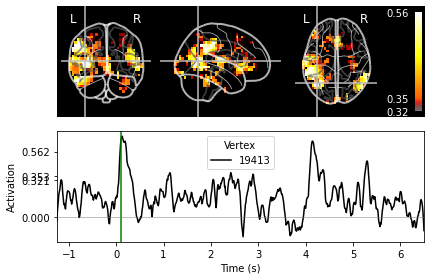

different 0.2
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.2 sec
Showing: t = 0.200 s, (-64.9, -37.2, 35.2) mm, [3, 15, 21] vox, 27159 vertex
Using control points [0.32098109 0.35320545 0.56234833]


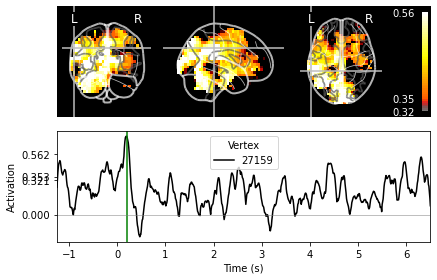

different 0.30000000000000004
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.30000000000000004 sec
Showing: t = 0.300 s, (-65.2, -21.6, 20.8) mm, [3, 19, 19] vox, 24741 vertex
Using control points [0.32098109 0.35320545 0.56234833]


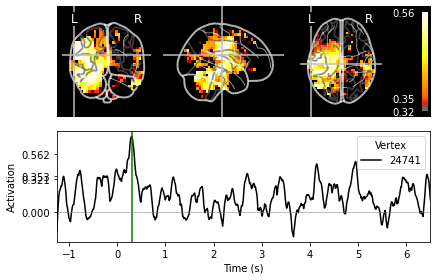

different 0.4
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.4 sec
Showing: t = 0.400 s, (42.4, -15.3, -43.1) mm, [23, 23, 7] vox, 9633 vertex
Using control points [0.32098109 0.35320545 0.56234833]


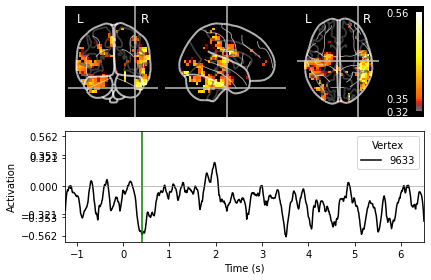

different 0.5
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.5 sec
Showing: t = 0.500 s, (66.9, -14.6, 12.7) mm, [28, 20, 17] vox, 22255 vertex
Using control points [0.32098109 0.35320545 0.56234833]


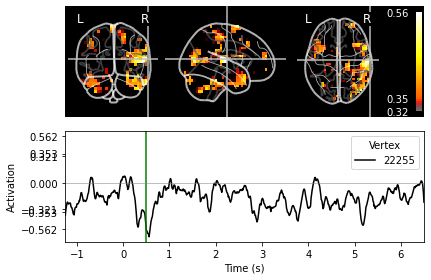

different 0.6000000000000001
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.6000000000000001 sec
Showing: t = 0.600 s, (-39.7, -15.1, 42.3) mm, [8, 19, 23] vox, 29830 vertex
Using control points [0.32098109 0.35320545 0.56234833]


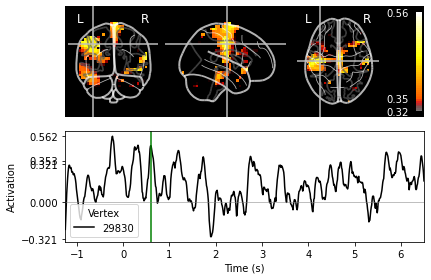

different 0.7000000000000001
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.7000000000000001 sec
Showing: t = 0.700 s, (-33.9, 20.7, -26.1) mm, [9, 30, 12] vox, 16191 vertex
Using control points [0.32098109 0.35320545 0.56234833]


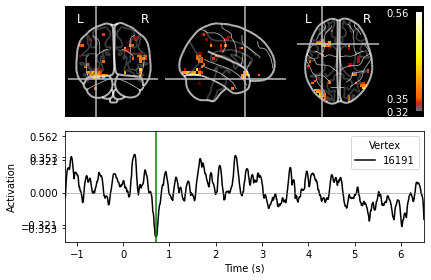

different 0.8
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.8 sec
Showing: t = 0.800 s, (23.8, -91.6, -15.9) mm, [19, 6, 9] vox, 11644 vertex
Using control points [0.32098109 0.35320545 0.56234833]


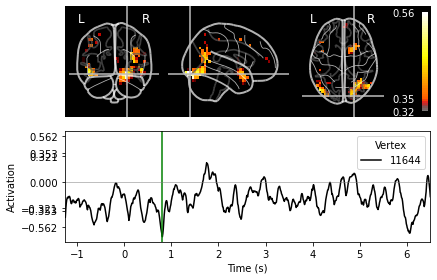

different 0.9
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.9 sec
Showing: t = 0.900 s, (-7.5, -90.9, -28.2) mm, [13, 7, 7] vox, 9127 vertex
Using control points [0.32098109 0.35320545 0.56234833]


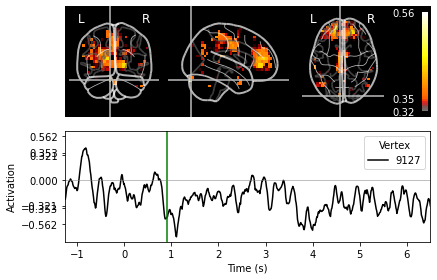

different 1.0
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.0 sec
Showing: t = 1.000 s, (36.9, 58.7, 17.6) mm, [23, 35, 21] vox, 27799 vertex
Using control points [0.32098109 0.35320545 0.56234833]


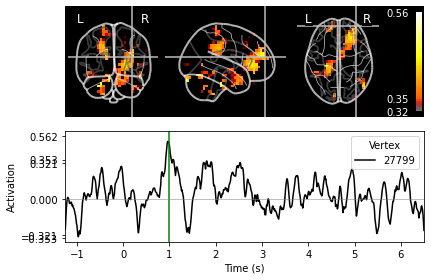

different 1.1
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.1 sec
Showing: t = 1.100 s, (-7.5, -90.9, -28.2) mm, [13, 7, 7] vox, 9127 vertex
Using control points [0.32098109 0.35320545 0.56234833]


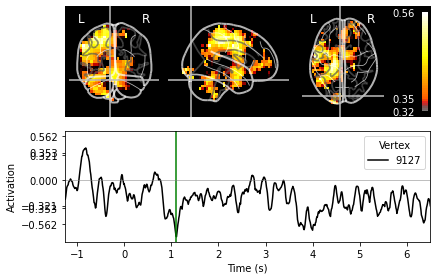

different 1.2000000000000002
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.2000000000000002 sec
Showing: t = 1.200 s, (-18.2, -2.7, 12.7) mm, [12, 23, 18] vox, 23603 vertex
Using control points [0.32098109 0.35320545 0.56234833]


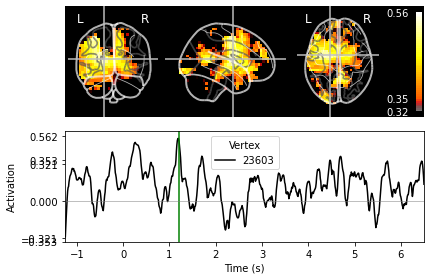

different 1.3
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.3 sec
Showing: t = 1.300 s, (-56.9, -70.8, -1.2) mm, [4, 10, 13] vox, 16837 vertex
Using control points [0.32098109 0.35320545 0.56234833]


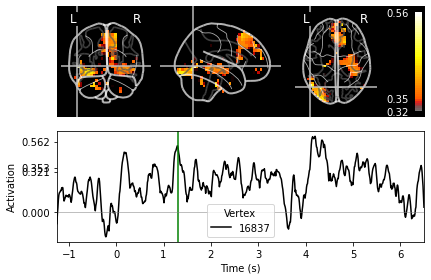

different 1.4000000000000001
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.4000000000000001 sec
Showing: t = 1.400 s, (-10.8, 55.0, 27.8) mm, [14, 34, 23] vox, 30301 vertex
Using control points [0.32098109 0.35320545 0.56234833]


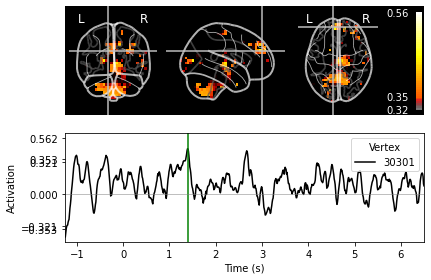

different 1.5
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.5 sec
Showing: t = 1.500 s, (67.1, -4.9, -6.0) mm, [28, 23, 14] vox, 18535 vertex
Using control points [0.32098109 0.35320545 0.56234833]


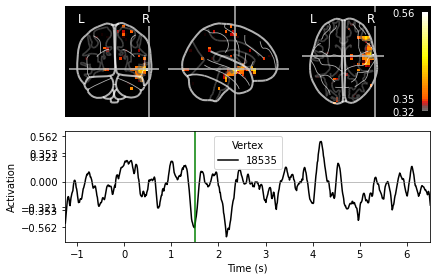

different 1.6
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.6 sec
Showing: t = 1.600 s, (29.1, -91.4, -15.8) mm, [20, 6, 9] vox, 11645 vertex
Using control points [0.32098109 0.35320545 0.56234833]


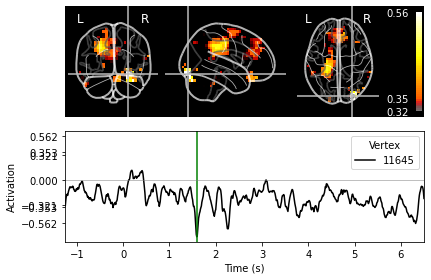

different 1.7000000000000002
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.7000000000000002 sec
Showing: t = 1.700 s, (-62.9, -38.3, -25.1) mm, [3, 18, 10] vox, 13271 vertex
Using control points [0.32098109 0.35320545 0.56234833]


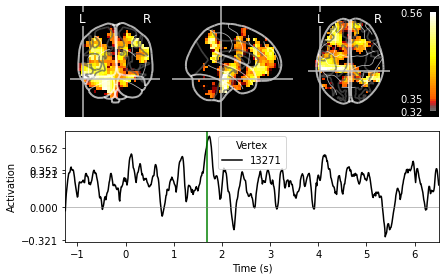

different 1.8
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.8 sec
Showing: t = 1.800 s, (4.5, -0.3, -36.7) mm, [16, 26, 9] vox, 12261 vertex
Using control points [0.32098109 0.35320545 0.56234833]


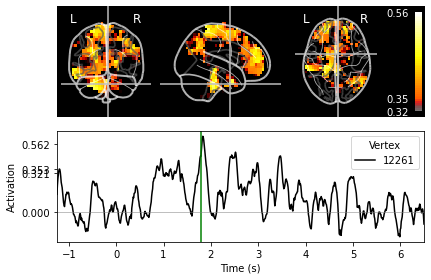

different 1.9000000000000001
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.9000000000000001 sec
Showing: t = 1.900 s, (11.1, -86.3, 43.1) mm, [17, 4, 20] vox, 25561 vertex
Using control points [0.32098109 0.35320545 0.56234833]


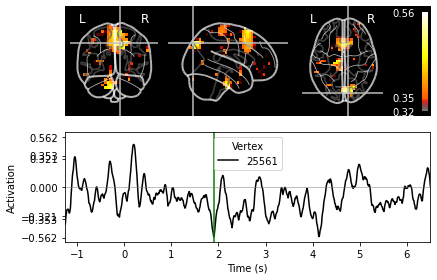

inverted 0.0
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.0 sec
Showing: t = 0.000 s, (-29.5, -72.0, -27.6) mm, [9, 11, 8] vox, 10518 vertex
Using control points [0.33126958 0.37303925 0.72635246]


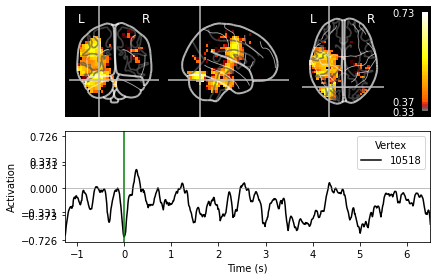

inverted 0.1
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.1 sec
Showing: t = 0.100 s, (67.6, -21.9, 3.3) mm, [28, 19, 15] vox, 19682 vertex
Using control points [0.33126958 0.37303925 0.72635246]


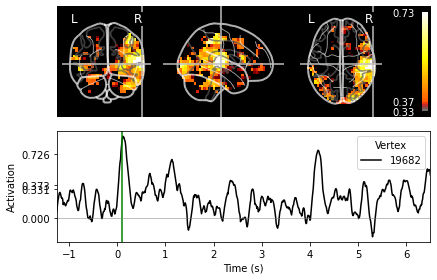

inverted 0.2
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.2 sec
Showing: t = 0.200 s, (67.1, -15.9, 7.5) mm, [28, 20, 16] vox, 20984 vertex
Using control points [0.33126958 0.37303925 0.72635246]


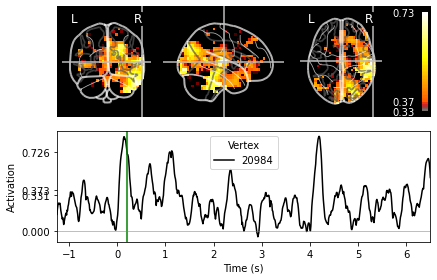

inverted 0.30000000000000004
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.30000000000000004 sec
Showing: t = 0.300 s, (-28.7, -98.2, -16.3) mm, [9, 5, 9] vox, 11603 vertex
Using control points [0.33126958 0.37303925 0.72635246]


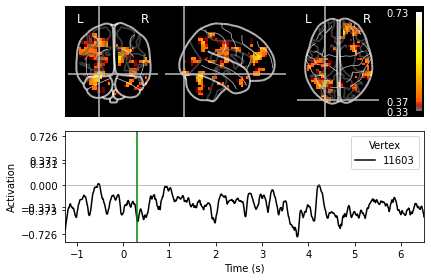

inverted 0.4
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.4 sec
Showing: t = 0.400 s, (-49.5, -27.4, 33.6) mm, [6, 17, 21] vox, 27224 vertex
Using control points [0.33126958 0.37303925 0.72635246]


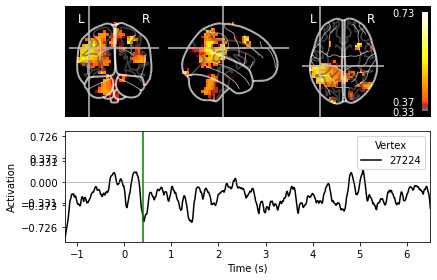

inverted 0.5
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.5 sec
Showing: t = 0.500 s, (-52.2, -74.4, 21.8) mm, [5, 8, 17] vox, 21860 vertex
Using control points [0.33126958 0.37303925 0.72635246]


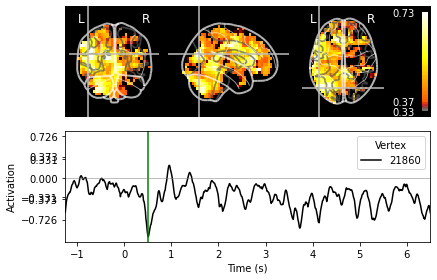

inverted 0.6000000000000001
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.6000000000000001 sec
Showing: t = 0.600 s, (-52.1, -71.2, 15.6) mm, [5, 9, 16] vox, 20620 vertex
Using control points [0.33126958 0.37303925 0.72635246]


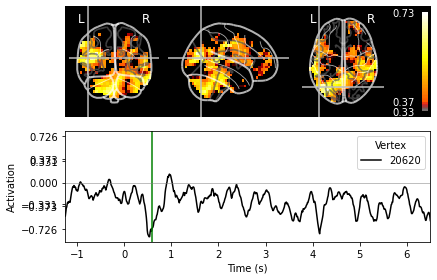

inverted 0.7000000000000001
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.7000000000000001 sec
Showing: t = 0.700 s, (61.5, -6.9, 5.4) mm, [27, 22, 16] vox, 21045 vertex
Using control points [0.33126958 0.37303925 0.72635246]


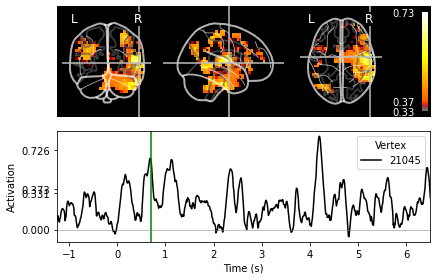

inverted 0.8
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.8 sec
Showing: t = 0.800 s, (-69.0, -40.9, 2.8) mm, [2, 16, 15] vox, 19563 vertex
Using control points [0.33126958 0.37303925 0.72635246]


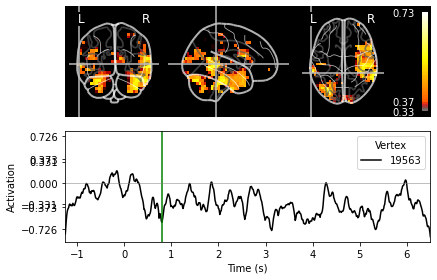

inverted 0.9
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.9 sec
Showing: t = 0.900 s, (48.5, -38.1, -37.9) mm, [24, 18, 7] vox, 9479 vertex
Using control points [0.33126958 0.37303925 0.72635246]


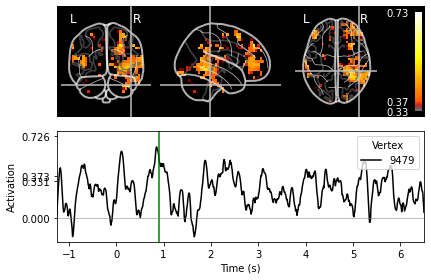

inverted 1.0
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.0 sec
Showing: t = 1.000 s, (-65.1, -18.3, 14.5) mm, [3, 20, 18] vox, 23501 vertex
Using control points [0.33126958 0.37303925 0.72635246]


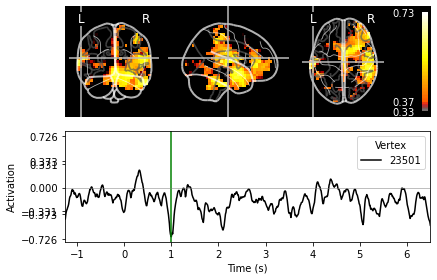

inverted 1.1
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.1 sec
Showing: t = 1.100 s, (67.1, -15.9, 7.5) mm, [28, 20, 16] vox, 20984 vertex
Using control points [0.33126958 0.37303925 0.72635246]


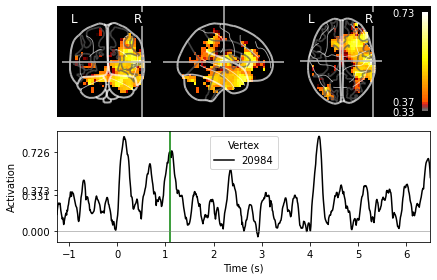

inverted 1.2000000000000002
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.2000000000000002 sec
Showing: t = 1.200 s, (-64.2, -41.3, 19.6) mm, [3, 15, 18] vox, 23346 vertex
Using control points [0.33126958 0.37303925 0.72635246]


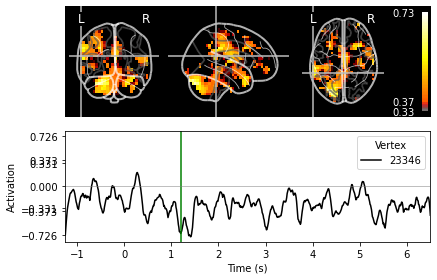

inverted 1.3
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.3 sec
Showing: t = 1.300 s, (30.2, 11.3, -32.8) mm, [21, 28, 10] vox, 13599 vertex
Using control points [0.33126958 0.37303925 0.72635246]


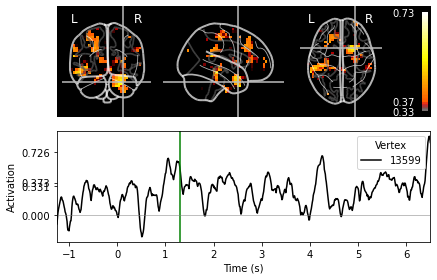

inverted 1.4000000000000001
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.4000000000000001 sec
Showing: t = 1.400 s, (-49.9, -24.7, 44.0) mm, [6, 17, 23] vox, 29766 vertex
Using control points [0.33126958 0.37303925 0.72635246]


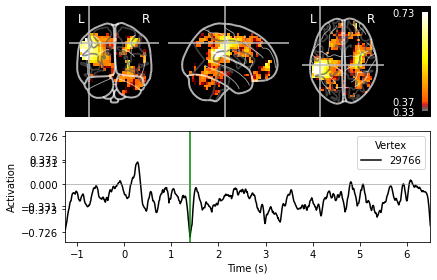

inverted 1.5
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.5 sec
Showing: t = 1.500 s, (-32.5, -65.5, 53.6) mm, [9, 8, 23] vox, 29490 vertex
Using control points [0.33126958 0.37303925 0.72635246]


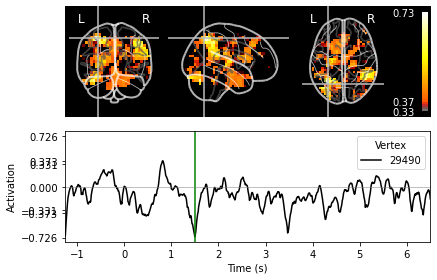

inverted 1.6
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.6 sec
Showing: t = 1.600 s, (-45.2, -80.4, -20.8) mm, [6, 9, 9] vox, 11724 vertex
Using control points [0.33126958 0.37303925 0.72635246]


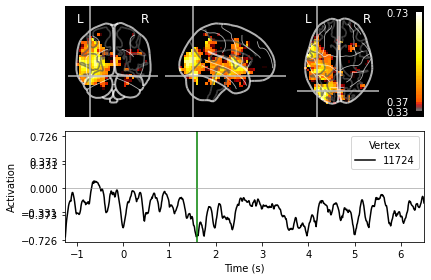

inverted 1.7000000000000002
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.7000000000000002 sec
Showing: t = 1.700 s, (-42.5, -51.0, 17.0) mm, [7, 13, 17] vox, 22017 vertex
Using control points [0.33126958 0.37303925 0.72635246]


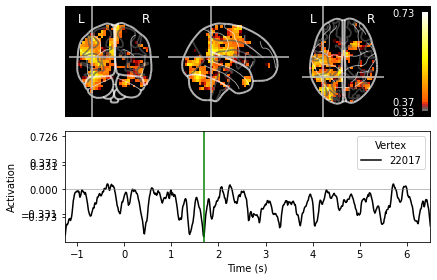

inverted 1.8
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.8 sec
Showing: t = 1.800 s, (-64.4, -36.7, 18.6) mm, [3, 16, 18] vox, 23377 vertex
Using control points [0.33126958 0.37303925 0.72635246]


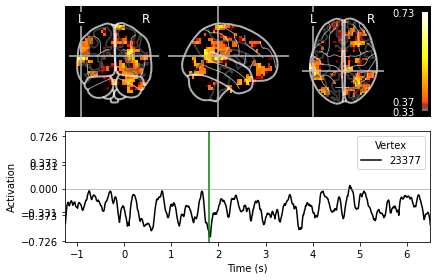

inverted 1.9000000000000001
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.9000000000000001 sec
Showing: t = 1.900 s, (-48.5, -47.2, 32.5) mm, [6, 13, 20] vox, 25829 vertex
Using control points [0.33126958 0.37303925 0.72635246]


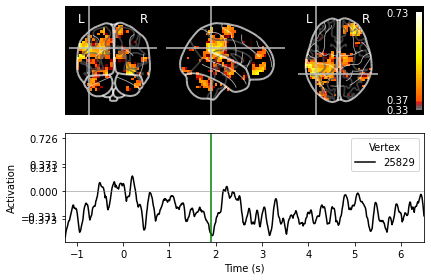

other 0.0
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.0 sec
Showing: t = 0.000 s, (24.1, -92.9, -21.2) mm, [19, 6, 8] vox, 10373 vertex
Using control points [0.31182278 0.35279755 0.63331104]


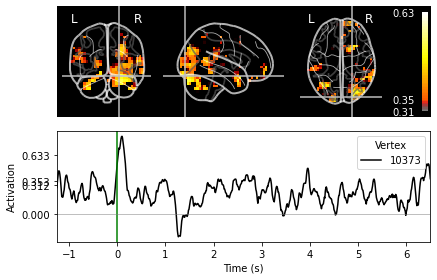

other 0.1
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.1 sec
Showing: t = 0.100 s, (24.2, -97.5, -20.1) mm, [19, 5, 8] vox, 10342 vertex
Using control points [0.31182278 0.35279755 0.63331104]


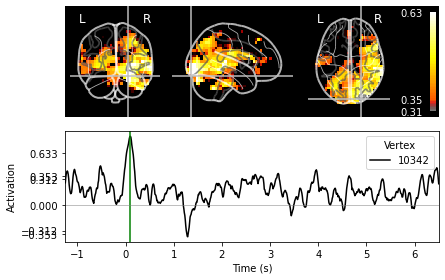

other 0.2
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.2 sec
Showing: t = 0.200 s, (31.2, -65.7, 44.8) mm, [21, 8, 21] vox, 26960 vertex
Using control points [0.31182278 0.35279755 0.63331104]


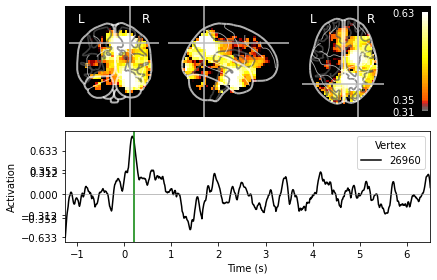

other 0.30000000000000004
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.30000000000000004 sec
Showing: t = 0.300 s, (-17.9, -99.1, -21.2) mm, [11, 5, 8] vox, 10334 vertex
Using control points [0.31182278 0.35279755 0.63331104]


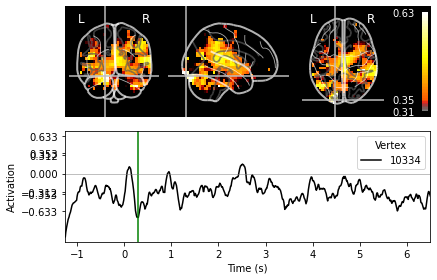

other 0.4
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.4 sec
Showing: t = 0.400 s, (-46.5, -80.1, 17.7) mm, [6, 7, 16] vox, 20559 vertex
Using control points [0.31182278 0.35279755 0.63331104]


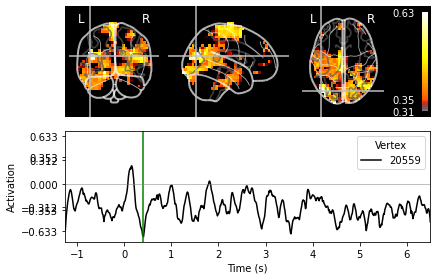

other 0.5
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.5 sec
Showing: t = 0.500 s, (-59.0, -30.0, 6.3) mm, [4, 18, 16] vox, 20898 vertex
Using control points [0.31182278 0.35279755 0.63331104]


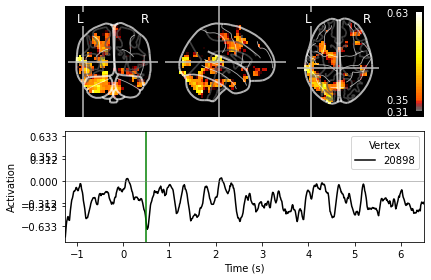

other 0.6000000000000001
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.6000000000000001 sec
Showing: t = 0.600 s, (43.6, 50.8, -13.5) mm, [24, 35, 15] vox, 20174 vertex
Using control points [0.31182278 0.35279755 0.63331104]


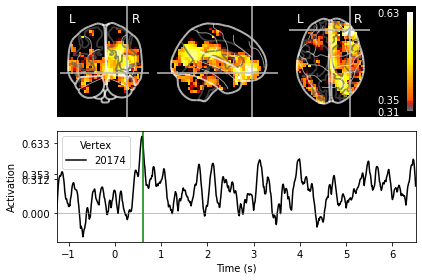

other 0.7000000000000001
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.7000000000000001 sec
Showing: t = 0.700 s, (64.4, -48.6, -24.0) mm, [27, 15, 9] vox, 11931 vertex
Using control points [0.31182278 0.35279755 0.63331104]


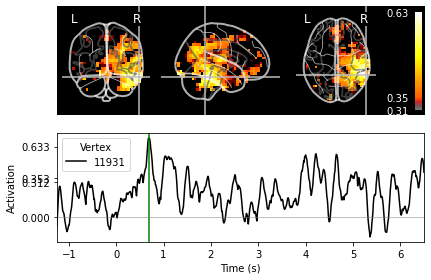

other 0.8
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.8 sec
Showing: t = 0.800 s, (-64.0, -45.9, 20.6) mm, [3, 14, 18] vox, 23315 vertex
Using control points [0.31182278 0.35279755 0.63331104]


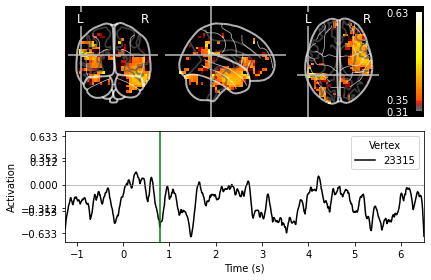

other 0.9
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.9 sec
Showing: t = 0.900 s, (45.2, 20.6, -17.8) mm, [24, 29, 13] vox, 17446 vertex
Using control points [0.31182278 0.35279755 0.63331104]


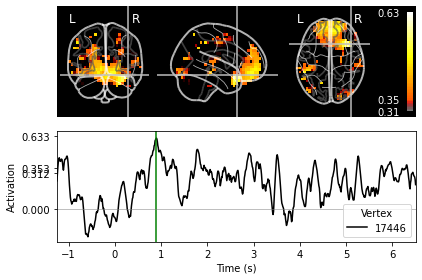

other 1.0
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.0 sec
Showing: t = 1.000 s, (40.3, 14.4, -22.1) mm, [23, 28, 12] vox, 16143 vertex
Using control points [0.31182278 0.35279755 0.63331104]


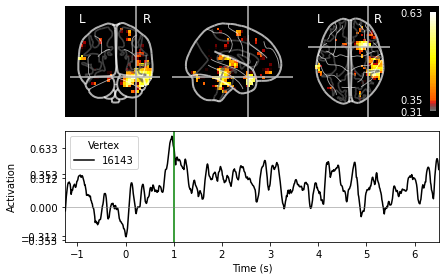

other 1.1
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.1 sec
Showing: t = 1.100 s, (-59.1, -33.2, 12.5) mm, [4, 17, 17] vox, 22138 vertex
Using control points [0.31182278 0.35279755 0.63331104]


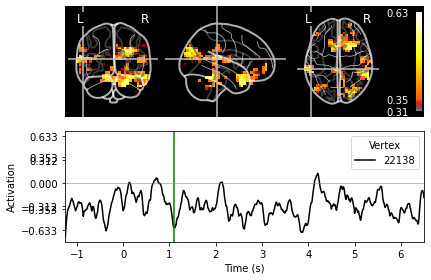

other 1.2000000000000002
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.2000000000000002 sec
Showing: t = 1.200 s, (-64.5, -43.2, 31.1) mm, [3, 14, 20] vox, 25857 vertex
Using control points [0.31182278 0.35279755 0.63331104]


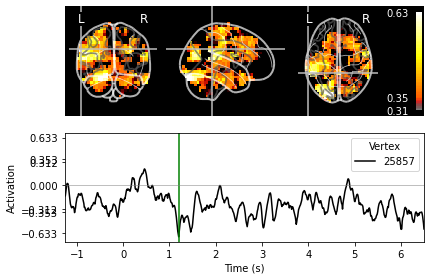

other 1.3
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.3 sec
Showing: t = 1.300 s, (-64.7, -38.6, 30.0) mm, [3, 15, 20] vox, 25888 vertex
Using control points [0.31182278 0.35279755 0.63331104]


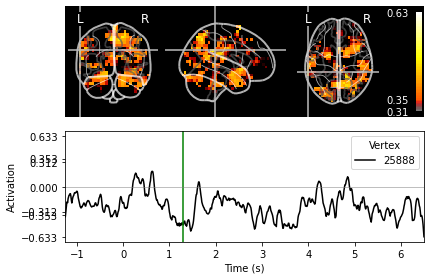

other 1.4000000000000001


KeyboardInterrupt: 

In [17]:
# Plot 1 stc
for s in all_stc:
        plot_times = np.arange(0,2,0.1)     
        for pt in plot_times:
            print('{} {}'.format(s,pt))
            brain = all_stc[s].plot(subjects_dir=subs_dir,initial_time = pt,#clim={'kind': 'value', 'lims': [10,15,20]},#time_viewer=True,
                                    mode = 'glass_brain',src = src)